**Rationale** In this assignment, you will practice specifying, running, and interpreting regressions involving non-linear functional forms and heterogeneous effects. You will be using the datasets located in your Datasets folder.

1. Avocado dataset
1. Starbucks campaign data

Helpful reference:
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/


In [ ]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
fpath = 'drive/MyDrive/ANLY6100/A5' # change to your data folder
os.listdir(fpath)

['avocado.csv', 'starbucks_promos.csv', 'Kellen_Nankervis_A5_Regression.ipynb']

# Problem 1 (50 points) Avocado prices

**Only use data for conventional types and remove the data for the region TotalUS**

First, write a loop through each unique region to plot the
1. Total Volume vs. Average Price
1. Total Volume vs. ln(Average Price)
1. ln(Total Volume) vs. Average Price
1. ln(Total Volume) vs. ln(Average Price)

For each of the above 4 plots, the syntax should look something like:
```
for r in df.region.unique():
    temp = df[df.region==r]
    plt.scatter(....) # fill this in
```

1. Which of the plots of the relationship between price and demand looks most "linear?"


In [ ]:
# read in the dataset and replace column name spaces with underscores
avocado = pd.read_csv(fpath + '/avocado.csv', index_col = 0)
avocado.columns = [c.replace(' ', '_') for c in avocado.columns]

In [ ]:
# select regions that are not TotalUS e.g. region != 'TotalUS' and only conventional types
avocado = avocado[(avocado.region != 'TotalUS') & (avocado.type == 'conventional')]



In [ ]:
# check the unique regions to make sure TotalUS is not in the region column
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
# check the unique types to make sure there are only conventional types
avocado.type.unique()


array(['conventional'], dtype=object)

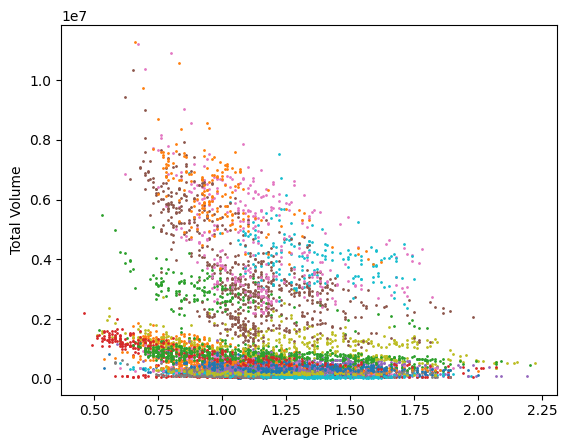

In [ ]:
# write a loop to plot total volume vs average price (e.g. Y vs. X) and color each region differently
# e.g.:
# for r in avocado.region.unique():
#     temp = avocado.loc[avocado.region == r]
#     plt.scatter( X , Y, s= 1) # <- change this, make sure average price is on the x-axis

for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(temp.AveragePrice, temp.Total_Volume, s= 1)
    plt.xlabel('Average Price')
    plt.ylabel('Total Volume')


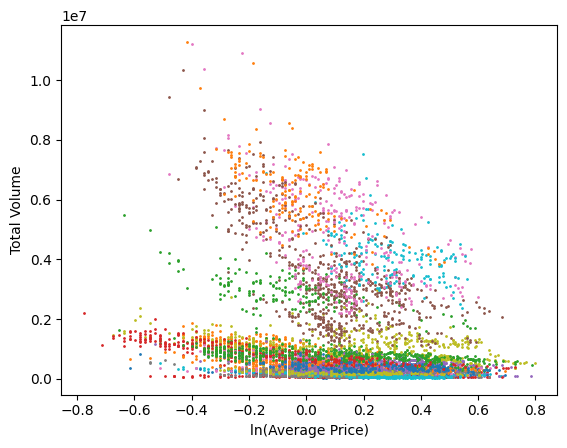

In [ ]:
# do the same, but now plot total volume vs. ln(average price)
# remember np.log() takes the log
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(np.log(temp.AveragePrice), temp.Total_Volume, s= 1)
    plt.xlabel('ln(Average Price)')
    plt.ylabel('Total Volume')


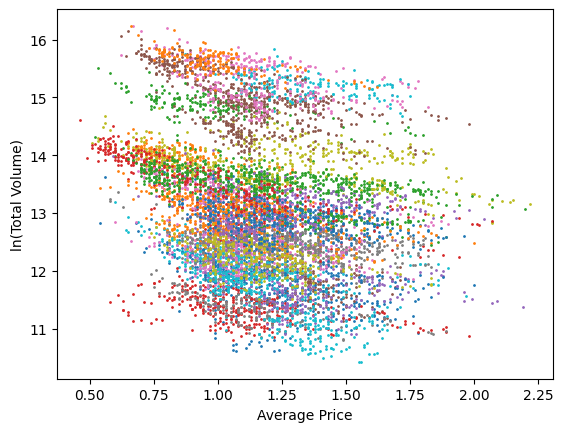

In [ ]:
# do the same, but now plot ln(Total_Volume) vs. AveragePrice
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(temp.AveragePrice, np.log(temp.Total_Volume), s= 1)
    plt.xlabel('Average Price')
    plt.ylabel('ln(Total Volume)')

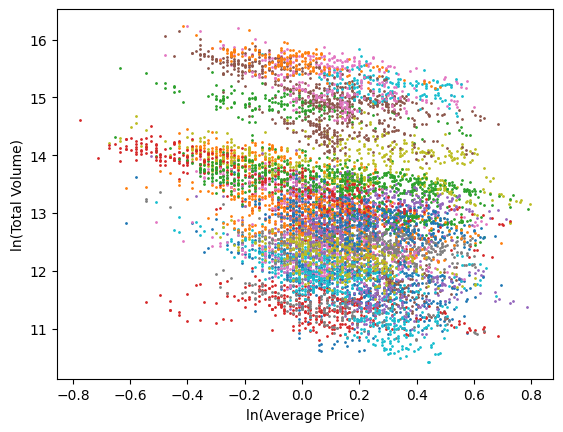

In [ ]:
# do the same, but now plot ln(Total_Volume) vs. ln(AveragePrice)
for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(np.log(temp.AveragePrice), np.log(temp.Total_Volume), s= 1)
    plt.xlabel('ln(Average Price)')
    plt.ylabel('ln(Total Volume)')



**EDIT THIS CELL**

Which plot seems to exhibit the most linear relationship within each region? (i.e. dots of the same color seem to form closest to a straight line).

The plot that seems to exhibit the most linear relationship, is the ln(Total Volume) vs. ln(Average Price) plot. This suggests that the log-log model may be most appropriate.

(*models can be level-level, log-log, level-log, log-level.*)


## Regression Model
Using the avocado dataset, estimate the following demand models while accounting for the region effects (incl region in the regression):

1. level - level
1. log - level
1. level - log
1. log - log

Answer the following:
1. Succinctly interpret the **price coefficient** for each model (pay attention to corresponding p-values as well).


**Review:** To summarize the various log transformations.

|Model| Dept. Var. | Expl. Var. | Approx. Interpretation | Exact interpretation|
|---|---|---|---|---|
|**level-log** $$y=\beta_0+\beta_1ln(x)+e$$ | $y$ | $ln(x)$ | $$\Delta y = \frac{\beta_1}{100}\%\Delta x$$ | $$\Delta y = \beta_1 ln(\frac{100+\%\Delta X}{100})$$|
|**log-level** $$ln(y)=\beta_0+\beta_1x+e$$ | $ln(y)$ | x |$$\%\Delta y = 100\cdot\beta_1\Delta x$$ | $$\%\Delta y = 100\cdot (e^{\beta_1}-1)\Delta x$$ |
|**log-log** $$ln(y)=\beta_0+\beta_1ln(x)+e$$ | $ln(y)$ | $ln(x)$ | $$\%\Delta y = \beta_1\%\Delta x$$ | $$\bigg(\big(1+\% \Delta x/100\big)^{\beta_1}-1\bigg)\times 100 $$|

The approximate interpretations are roughly accurate for small changes in $x$, particularly if the magnitude of $\beta_1$ is small (whether positive or negative).


If you've forgotten what logarithms are from algebra/precalc, please [review](https://www.youtube.com/watch?v=_divhRCjVok).


In [ ]:
# run the level-level regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
res = smf.ols('Total_Volume ~ AveragePrice + region', data = avocado).fit()

# print the regression table below
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:41:49   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**Edit this cell**

For the level-level regression, explain the coefficient for the price variable:

1. Answer here: The coefficient for the price is -576700. This means that for every 1 dollar increase in price, the total volume decreases by 576700 avocados holding all other variables constant.

In [ ]:
# run the log-level regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
res = smf.ols('np.log(Total_Volume) ~ AveragePrice + region', data = avocado).fit()

# print the regression table below
print(res.summary())


                             OLS Regression Results                             
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.975
Model:                              OLS   Adj. R-squared:                  0.975
Method:                   Least Squares   F-statistic:                     6552.
Date:                  Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                          17:41:50   Log-Likelihood:                 2047.2
No. Observations:                  8957   AIC:                            -3986.
Df Residuals:                      8903   BIC:                            -3603.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

**Edit this cell**

For the log-level regression, explain the coefficient for the price variable:

1. Answer here: The coefficient for the average price is -0.5786. When we take the exponential of this coefficient and subtract 1, we get -0.439. This means that for every 1 dollar increase in price, the total volume decreases by 43.9% holding all other variables constant.



In [ ]:
# run the level-log regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
res = smf.ols('Total_Volume ~ np.log(AveragePrice) + region', data = avocado).fit()


# print the regression table below
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3308.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:41:50   Log-Likelihood:            -1.2695e+05
No. Observations:                8957   AIC:                         2.540e+05
Df Residuals:                    8903   BIC:                         2.544e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**Edit this cell**

For the level-log regression, explain the coefficient for the price variable:

1. Answer here: The coefficient for the ln(AveragePrice) is -748000. This means that for every 1% increase in the average price, the total volume decreases by about 7443 avocados holding all other variables constant.

In [ ]:
# run the log-log regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
res = smf.ols('np.log(Total_Volume) ~ np.log(AveragePrice) + region', data = avocado).fit()

# print the regression table below
print(res.summary())


                             OLS Regression Results                             
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.976
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                     6817.
Date:                  Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                          17:41:50   Log-Likelihood:                 2220.8
No. Observations:                  8957   AIC:                            -4334.
Df Residuals:                      8903   BIC:                            -3950.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

**Edit this cell**

For the log-log regression, explain the meaning of the coefficient for the price variable:

1. Answer here: The coefficient for the ln(AveragePrice) is -0.7222. This means that for every 1% increase in the average price, the total volume decreases by about 0.7160% holding all other variables constant.




# Problem 2 (50 points)

Use the Starbucks promotions data. Filter the data to use only the rows satisfying all of the following conditions:

1. Transaction amount more than 0 and less than 50.
1. Income is not missing (df.income.notnull())

We suspect the average transaction value might be higher for individuals with higher incomes. We also suspect that the higher the offer difficulty (min. amount spend needed to redeem), the higher the spend. However, this effect might be different depending on income. Additionally, the offer type (buy one get one vs. discount) may impact the transaction amount. Moreover, this effect of the offer type may differ depending on income.

1. To capture all of these potential effects, run the following regression:
$$
ln(\text{Trans Amt}) = \beta_0 + \beta_1 ln(\text{Inc}) + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer} + \beta_4 ln(\text{Inc})\times \text{difficulty} + \beta_5  ln(\text{Inc})\times \text{Disc Offer}+ e
$$

1. Succinctly interpret the regression results.

**Edit this cell**

Demonstrate your understanding of interpretating regressions here by filling the blanks in the statements below:

1. In terms of the $\beta's$ in the equation above, 1% increase in income when a discount offer is made and qualification difficulty is \$10 leads to approximately $[\beta_1 + \beta_4 \times 10 + \beta_5 \times 1]$% change in transaction amount.
1. In terms of the $\beta's$ in the equation above, 1% increase in income when a BOGO offer is made and qualification difficulty is \$5 leads to approximately $[\beta_1 + \beta_4 \times 5 + \beta_5 \times 0]$% change in transaction amount.

**Remember** the solution here is not as simple as looking at a single coefficient. The effect of income depends on offer type and difficulty.

Note, you can re-write the equation as:
$$
ln(\text{Trans Amt}) = \beta_0  + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer}  + \big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big] \times ln(\text{Inc})+ e
$$

Where the entire effect of $ln(income)$ on $ln(TransactionAmount)$ is captured by the expression $\big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big]$.

In [ ]:
sb = pd.read_csv(fpath + '/starbucks_promos.csv', index_col=0) # read the starbucks data

In [ ]:
# select rows with transactions >0 but <50 and income is not missing
# replace sb with the result of the selection
#sb.head()
sb = sb[(sb.transaction_amount > 0) & (sb.transaction_amount < 50) & (sb.income.notnull())]



In [ ]:
# run the regression here, store the result as the variable res
res = smf.ols('np.log(transaction_amount) ~ np.log(income) + difficulty + offer_type + np.log(income) * difficulty + np.log(income) * offer_type', data = sb).fit()


In [ ]:
# print the result summary here, e.g. print(res.summary()):
print(res.summary())


                                OLS Regression Results                                
Dep. Variable:     np.log(transaction_amount)   R-squared:                       0.409
Model:                                    OLS   Adj. R-squared:                  0.409
Method:                         Least Squares   F-statistic:                     4243.
Date:                        Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                                17:41:51   Log-Likelihood:                -21161.
No. Observations:                       30695   AIC:                         4.233e+04
Df Residuals:                           30689   BIC:                         4.238e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the the estimated coefficients, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately $[1.1575 + (-0.0316) \times 10 + 0.4724 \times 1]$% **increase** in transaction amount.
1. In terms of the estimated coefficients, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to $[1.1575 + (-0.0316) \times 5]$% **increase** in transaction amount.

**Basically,** substitute the $\beta's$ from the answer above with the estimated coefficients.